In [11]:
import tensorflow as tf
import torch

# check if GPU is being used
print("GPU Status: ", end = '')
if len(tf.config.list_physical_devices('GPU')) != 0: print("Active")
else: print("Inactive")

GPU Status: Active


In [12]:
# TensorFlow and tf.keras
import numpy as np
from tensorflow import keras
import autokeras as ak

#tf version should be 2.5 or higher
tf.__version__

'2.10.0'

In [13]:
#get data
(train_images, train_labels), (test_images, test_labels) = \
      keras.datasets.fashion_mnist.load_data()

In [14]:
#scale data
train_images = train_images / 255.0
test_images = test_images / 255.0

In [15]:
#reshape inputs for CNN layers
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [16]:
import os
from tensorboard.plugins.hparams import api as hp

# set hparams
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'adagrad', 'rmsprop', 'sgd']))

In [17]:
def train_model(hparams):

  model = keras.Sequential([
    keras.layers.Conv2D(kernel_size = 3, filters = 12, use_bias = False, padding = 'same', input_shape = (28, 28, 1)),
    keras.layers.BatchNormalization(center = True, scale = False),
    keras.layers.Activation('relu'),

    keras.layers.Conv2D(kernel_size = 6, filters = 24, use_bias = False, padding = 'same', strides = 1),
    keras.layers.BatchNormalization(center = True, scale = False),
    keras.layers.Activation('relu'),

    keras.layers.Conv2D(kernel_size = 6, filters = 32, use_bias = False, padding = 'same', strides = 1),
    keras.layers.BatchNormalization(center = True, scale = False),
    keras.layers.Activation('relu'),

    keras.layers.Conv2D(kernel_size = 6, filters = 32, use_bias = False, padding = 'same', strides = 1),
    keras.layers.BatchNormalization(center = True, scale = False),
    keras.layers.Activation('relu'),

    keras.layers.Flatten(),

    keras.layers.Dense(200, use_bias = False),
    keras.layers.BatchNormalization(center = True, scale = False),
    keras.layers.Activation('relu'),

    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = 'softmax')
  ])

  model.compile(
    optimizer=hparams[HP_OPTIMIZER],
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
  )

  model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
  _, accuracy = model.evaluate(test_images, test_labels)
  return accuracy


In [18]:
optimizer_name = []
optimizer_accuracy = []

for optimizer in HP_OPTIMIZER.domain.values:
    hparams = { HP_OPTIMIZER: optimizer }
    accuracy = train_model(hparams)
    optimizer_name.append(optimizer)
    optimizer_accuracy.append(accuracy)
    


Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4490 - accuracy: 0.8454 - val_loss: 0.3416 - val_accuracy: 0.8771
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3048 - accuracy: 0.8949 - val_loss: 0.3069 - val_accuracy: 0.8913
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2534 - accuracy: 0.9119 - val_loss: 0.2858 - val_accuracy: 0.8984
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2233 - accuracy: 0.9247 - val_loss: 0.2757 - val_accuracy: 0.8987
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1980 - accuracy: 0.9347 - val_loss: 0.2665 - val_accuracy: 0.9041
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1789 - accuracy: 0.9417 - val_loss: 0.2614 - val_accuracy: 0.9052
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1616 - accuracy: 0.9494 - val_loss: 0.2640 -

In [19]:
for i in range (4):
    print(str(optimizer_name[i]) + " accuracy: " + str(optimizer_accuracy[i]))

adagrad accuracy: 0.9108999967575073
adam accuracy: 0.925000011920929
rmsprop accuracy: 0.9247000217437744
sgd accuracy: 0.920799970626831


(90.0, 93.0)

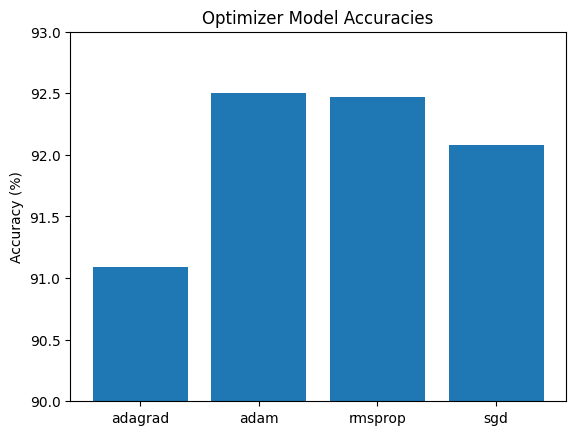

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.bar(optimizer_name, np.multiply(optimizer_accuracy, 100))

ax.set_ylabel('Accuracy (%)')
ax.set_title('Optimizer Model Accuracies')
ax.set_ylim([90, 93])